## Final Project Submission

* **Student name:** Tiara Hlaing
* **Student pace:** Full Time
* **Scheduled project review date/time:** May 2019
* **Instructor name:** Joe San Pietro
* **Blog post URL:** https://thetiaramisu.wordpress.com/


## Introduction

Every year, New York State publishes state data on motor vehicle crashes. The New York State **[Open Data Initiative](https://data.ny.gov/)** began in 2013, with the goal of laying the foundation for a more open, transparent, and innovative state.

Currently, they have crash data available that was collected from the years 2014, 2015, and 2016. From the source, I saw that there are over 2.2 million entries in the individuals dataset and over 1.6 million entries in the vehicles dataset, spanning across the three years. I will just be working with crash data from the year 2016.

The objective is to discover what factors contribute to people getting injured in a car accident, to determine what can be done to prevent injury in the case of a crash.

The data sets I will be using are:

1) **[Individuals](https://data.ny.gov/Transportation/Motor-Vehicle-Crashes-Individual-Information-Three/ir4y-sesj):** Attributes about each individual involved in a crash as reported to NYS DMV

2) **[Vehicles](https://data.ny.gov/Transportation/Motor-Vehicle-Crashes-Individual-Information-Three/ir4y-sesj):** Attributes about each vehicle involved in a crash as reported to NYS DMV

The information from each has been cleaned in separate notebooks and will be merged here.

## The OSEMN Framework

The OSEMN Framework is the data science process that will be used in this project. The process consists of the following steps.

1. **Obtain:** Understanding the details of the assignment, the objective in addressing the questions at hand, and obtaining the relevant data.
2. **Scrub:** Filtering through the collected data to get it to a useful and workable condition. This may include removing irrelevant or cumbersome data, and addressing the issues of messy values in the data set.
3. **Explore:** Taking steps to gain an understanding of the data set, such as creating visualizations to further explore the distributions and relationships amongst variables.
4. **Model:** Building and tuning models using machine learning algorithms to develop a final model that can make future predictions with confidence.
5. **iNterpret:** Drawing conclusions from the data, evaluating the meaning and implications of the findings, and communicating the results.

## Obtaining the Data

### Loading Libraries

In [198]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import copy

pd.set_option('display.max_columns', None) # Displays all columns

from scipy.stats import kurtosis, skew

import warnings
warnings.filterwarnings('ignore')

In [199]:
# Function for previews

def view(df,n):
    with pd.option_context('display.max_rows',n*2):
        display(df)

### Loading and Previewing the Data

In [200]:
# Individuals involved

ind = pd.read_csv('individuals.csv')

# Vehicles involved

veh = pd.read_csv('vehicles.csv')

### Individuals

This dataset includes information for all individuals involved in motor vehicle accidents in New York in the year 2016. It describes descriptive profile information about the individual, seating position, the safety equipment that was used, and whether or not he was injured in the crash.

#### Preview

In [201]:
# Preview of the first and last 3 rows of Individuals

view(ind,3)

,Unnamed: 0,ind_id,veh_id,seating,sex,age,airbag,seatbelt,lapbelt_only,childrestraint,injured
0,30248,17475364,13364180,driver,f,24,True,True,False,False,True
1,30249,17475365,13364180,pass_backmid,m,1,False,False,False,True,False
2,30250,17475366,13364181,driver,m,27,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
628995,747796,19505119,14867165,driver,f,45,False,True,False,False,True
628996,747797,19505120,14867165,pass_frontright,m,14,False,True,False,False,True
628997,747798,19508301,14869334,driver,m,20,False,True,False,False,True


#### Column Descriptions

Data Dictionary for NYS Crash Individual Dataset:

* **ind_id:** ID assigned to the individual in the crash case. This is strictly a database key and not a personal identifier such as a driver license number.
* **veh_id:** ID assigned to the vehicle in the crash case. This is strictly a database key, and not a vehicle identifier such as a VIN or plate number.
* **seating:** Reported seating position description of the individual in the crash.
* **sex:** Sex of individual. M = “Male” F = “Female”
* **age:** Reported age of the individual in the crash.
* **airbag:** Whether or not the airbag deployed
* **seatbelt:** Whether or not the individual was wearing a seatbelt when the crash occurred.
* **lapbelt_only:** Whether or not the individual was wearing a lapbelt (with not harness) when the crash occurred.
* **childrestraint:** Whether or not the individual was wearing a child restraint when the crash occurred.
* **injured:** Whether or not the individual was injured. This is the target variable.

### Vehicles

This dataset includes information for all vehicles involved in motor vehicle accidents in New York in the year 2016. It provides descriptive information on the vehicle itself, as well as information pertaining to the context for the accident.

#### Preview

In [202]:
# Preview of the first and last 3 rows of Individuals

view(veh,3)

,Unnamed: 0,veh_id,veh_type,prior_action,direction_travel,num_occupants,engine_cylinders,veh_make,cause,veh_age
0,0,13364180,suburban,goingstraightahead,east,2.0,4.0,nissan,human,2
1,1,13364181,sedan,merging,south,1.0,4.0,hyundai,human,10
2,2,13364182,sedan,goingstraightahead,south,1.0,4.0,honda,human,8
...,...,...,...,...,...,...,...,...,...,...
429830,560602,14867087,sedan,parked,still,0.0,6.0,chrysler,human,10
429831,560603,14867164,sedan,goingstraightahead,south,1.0,4.0,honda,human,9
429832,560604,14867165,suburban,stoppedintraffic,south,2.0,4.0,ford,human,3


#### Column Descriptions

From the Data Dictionary for NYS Crash Vehicle Dataset:

* **veh_id:** ID assigned to the vehicle in the crash case. This is strictly a database key and not an identifier such as a VIN.
* **veh_type:** Type of vehicle.
* **prior_action:** Action of vehicle just prior to crash, if known and applicable.
* **direction_travel:** Direction the vehicle was traveling at time of crash, if known and applicable.
* **num_occupants:** Number of occupants in vehicle at time of crash.
* **engine_cylinders:** Number of cylinders the vehicle has.
* **veh_make:** Make of the vehicle.
* **cause:** Category of contributing factor toward the crash (possible entries are: environment, human, or vehicle)
* **veh_age:** Age of the vehicle since manufactured.

## Merging the Dataframes

I will be using the individuals dataframe as my base and adding the associated vehicle information based on vehicle id.

In [203]:
df = pd.merge(ind, veh, on='veh_id', how='left')

In [204]:
view(df,5)

,Unnamed: 0_x,ind_id,veh_id,seating,sex,age,airbag,seatbelt,lapbelt_only,childrestraint,injured,Unnamed: 0_y,veh_type,prior_action,direction_travel,num_occupants,engine_cylinders,veh_make,cause,veh_age
0,30248,17475364,13364180,driver,f,24,True,True,False,False,True,0.0,suburban,goingstraightahead,east,2.0,4.0,nissan,human,2.0
1,30249,17475365,13364180,pass_backmid,m,1,False,False,False,True,False,0.0,suburban,goingstraightahead,east,2.0,4.0,nissan,human,2.0
2,30250,17475366,13364181,driver,m,27,True,True,False,False,False,1.0,sedan,merging,south,1.0,4.0,hyundai,human,10.0
3,30251,17475367,13364182,driver,m,34,True,True,False,False,True,2.0,sedan,goingstraightahead,south,1.0,4.0,honda,human,8.0
4,30252,17475510,13364283,driver,m,21,False,True,False,False,False,3.0,sedan,goingstraightahead,north,1.0,4.0,dodge,envmt,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628993,747793,19504241,14866236,pass_backright,m,26,False,False,False,False,False,560598.0,sedan,goingstraightahead,west,2.0,4.0,nissan,human,10.0
628994,747795,19505118,14867164,driver,m,43,False,True,False,False,False,560603.0,sedan,goingstraightahead,south,1.0,4.0,honda,human,9.0
628995,747796,19505119,14867165,driver,f,45,False,True,False,False,True,560604.0,suburban,stoppedintraffic,south,2.0,4.0,ford,human,3.0
628996,747797,19505120,14867165,pass_frontright,m,14,False,True,False,False,True,560604.0,suburban,stoppedintraffic,south,2.0,4.0,ford,human,3.0


## Cleaning

In [205]:
# Removing irrelevant id columns

df = df.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'])

In [206]:
print(f'Number of rows that with no associated vehicle from vehicle dataset: {len(df[df.veh_make.isna()])}')
print(f'Percentage of rows that with no associated vehicle from vehicle dataset: {len(df[df.veh_make.isna()])/len(df)}')

Number of rows that with no associated vehicle from vehicle dataset: 100058
Percentage of rows that with no associated vehicle from vehicle dataset: 0.15907522758418946


There are entries in the individuals dataset that do not have associated vehicles from the vehicles dataset. As the information from both datasets are important in our analysis, I will remove the entries with no associated vehicle information.

In [207]:
df = df[~df.veh_make.isna()]

In [208]:
# Checking that everything looks good now

view(df,5)

,ind_id,veh_id,seating,sex,age,airbag,seatbelt,lapbelt_only,childrestraint,injured,veh_type,prior_action,direction_travel,num_occupants,engine_cylinders,veh_make,cause,veh_age
0,17475364,13364180,driver,f,24,True,True,False,False,True,suburban,goingstraightahead,east,2.0,4.0,nissan,human,2.0
1,17475365,13364180,pass_backmid,m,1,False,False,False,True,False,suburban,goingstraightahead,east,2.0,4.0,nissan,human,2.0
2,17475366,13364181,driver,m,27,True,True,False,False,False,sedan,merging,south,1.0,4.0,hyundai,human,10.0
3,17475367,13364182,driver,m,34,True,True,False,False,True,sedan,goingstraightahead,south,1.0,4.0,honda,human,8.0
4,17475510,13364283,driver,m,21,False,True,False,False,False,sedan,goingstraightahead,north,1.0,4.0,dodge,envmt,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628991,19504231,14866399,driver,m,27,False,False,False,False,False,sedan,unknown,still,2.0,5.0,volkswagen,human,3.0
628993,19504241,14866236,pass_backright,m,26,False,False,False,False,False,sedan,goingstraightahead,west,2.0,4.0,nissan,human,10.0
628994,19505118,14867164,driver,m,43,False,True,False,False,False,sedan,goingstraightahead,south,1.0,4.0,honda,human,9.0
628995,19505119,14867165,driver,f,45,False,True,False,False,True,suburban,stoppedintraffic,south,2.0,4.0,ford,human,3.0


In [209]:
# Checking for duplicates

print(f'Number of duplicates in Individual ID: {(df.ind_id.value_counts() > 1).sum()}')
print(f'Number of duplicates in Vehicle ID: {(df.veh_id.value_counts() > 1).sum()}')

Number of duplicates in Individual ID: 0
Number of duplicates in Vehicle ID: 92074


There are multiple entries for the same veh_id, because many of the vehicles involved in the crashes contained multiple occupants. This is okay.

### Setting the Index

Each entry in this dataset represents an individual involved in a motor vehicle accident, identified by the individual id. I will set this as the index.

In [210]:
df.set_index('ind_id', inplace=True)

### Fixing Data Types

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528940 entries, 17475364 to 19505120
Data columns (total 17 columns):
veh_id              528940 non-null int64
seating             528940 non-null object
sex                 528940 non-null object
age                 528940 non-null int64
airbag              528940 non-null bool
seatbelt            528940 non-null bool
lapbelt_only        528940 non-null bool
childrestraint      528940 non-null bool
injured             528940 non-null bool
veh_type            528940 non-null object
prior_action        528940 non-null object
direction_travel    528940 non-null object
num_occupants       528940 non-null float64
engine_cylinders    528940 non-null float64
veh_make            528940 non-null object
cause               528940 non-null object
veh_age             528940 non-null float64
dtypes: bool(5), float64(3), int64(2), object(7)
memory usage: 55.0+ MB


Vehicle ID contains numbers, however, those numbers are identifiers for the vehicles; this should not be a continuous features. I will transform the continuous features for number of occupants, engine cylinders, and vehicle into int type.

In [212]:
df.veh_id = df.veh_id.astype(str)
df.num_occupants = df.num_occupants.astype(int)
df.engine_cylinders = df.engine_cylinders.astype(int)
df.veh_age = df.veh_age.astype(int)

In [213]:
view(df,3)

,veh_id,seating,sex,age,airbag,seatbelt,lapbelt_only,childrestraint,injured,veh_type,prior_action,direction_travel,num_occupants,engine_cylinders,veh_make,cause,veh_age
ind_id,,,,,,,,,,,,,,,,,
17475364,13364180,driver,f,24,True,True,False,False,True,suburban,goingstraightahead,east,2,4,nissan,human,2
17475365,13364180,pass_backmid,m,1,False,False,False,True,False,suburban,goingstraightahead,east,2,4,nissan,human,2
17475366,13364181,driver,m,27,True,True,False,False,False,sedan,merging,south,1,4,hyundai,human,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19505118,14867164,driver,m,43,False,True,False,False,False,sedan,goingstraightahead,south,1,4,honda,human,9
19505119,14867165,driver,f,45,False,True,False,False,True,suburban,stoppedintraffic,south,2,4,ford,human,3
19505120,14867165,pass_frontright,m,14,False,True,False,False,True,suburban,stoppedintraffic,south,2,4,ford,human,3


## EDA

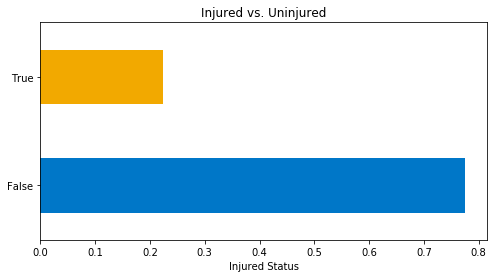

In [215]:
plt.figure(figsize=(8,4))
df.injured.value_counts(normalize=True).plot(kind='barh', color=['#0077c8','#f2a900'])
plt.title('Injured vs. Uninjured')
plt.xlabel('Injured Status')
plt.show()

### Histograms of Numeric Features

In [216]:
df.describe()

,age,num_occupants,engine_cylinders,veh_age
count,528940.000000,528940.000000,528940.000000,528940.000000
mean,38.522738,1.877924,5.183643,7.441148
std,19.372409,2.152439,1.397691,4.710097
min,0.000000,0.000000,1.000000,0.000000
25%,23.000000,1.000000,4.000000,3.000000
50%,36.000000,1.000000,4.000000,7.000000
75%,53.000000,2.000000,6.000000,11.000000
max,95.000000,881.000000,12.000000,17.000000


In [217]:
numeric_cols = df.describe().columns

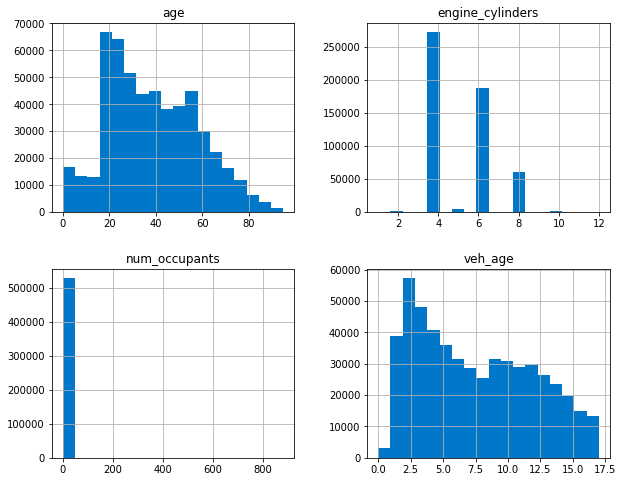

In [219]:
df[numeric_cols].hist(bins=18,figsize=(10,8), color='#0077c8');

In [220]:
for each in list(numeric_cols):
    print('For '+str(each)+' the skew is '+str(round(skew(df[each]),3))+' and the kurtosis is '+str(round(kurtosis(df[each]),3)))

For age the skew is 0.333 and the kurtosis is -0.578
For num_occupants the skew is 137.163 and the kurtosis is 52969.178
For engine_cylinders the skew is 0.738 and the kurtosis is -0.372
For veh_age the skew is 0.326 and the kurtosis is -1.097


Each of the numeric datasets is skewed positive. I will have to address this later by transforming the data before modeling. Number of occupants, though, seems to have very strong outliers. I will go ahead and trim these out.

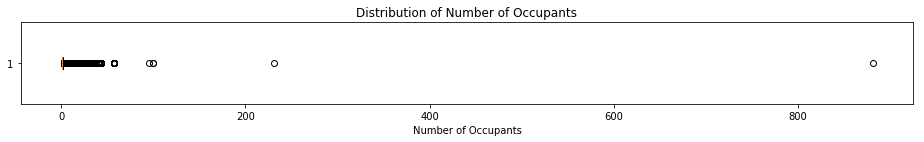

In [221]:
plt.figure(figsize=(16,1.5))
plt.boxplot(df.num_occupants,vert=False)
plt.title("Distribution of Number of Occupants")
plt.xlabel("Number of Occupants")
plt.show()

In [222]:
# Removing entries for individuals who were in motor vehicle accidents
    # where more than 50 others were in the vehicle with them.

df = df[df.num_occupants < 50]

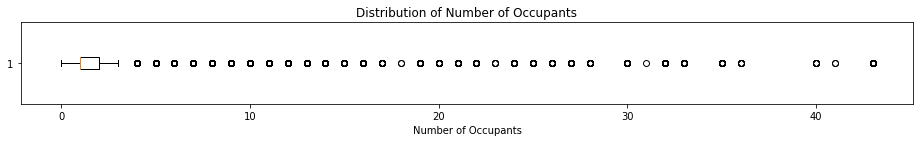

In [223]:
plt.figure(figsize=(16,1.5))
plt.boxplot(df.num_occupants,vert=False)
plt.title("Distribution of Number of Occupants")
plt.xlabel("Number of Occupants")
plt.show()

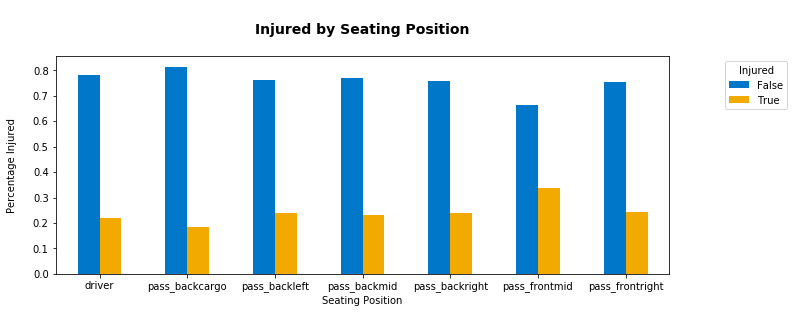

In [30]:
sub_df = df.groupby('seating')['injured'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['#0077c8','#f2a900'], figsize=(11,4))
plt.xlabel("Seating Position")
plt.xticks(rotation=0)
plt.ylabel("Percentage Injured\n")
plt.title('\nInjured by Seating Position\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Injured');

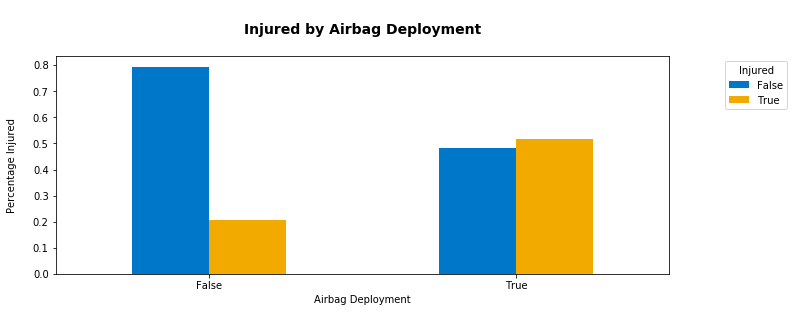

In [314]:
sub_df = df.groupby('airbag')['injured'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['#0077c8','#f2a900'], figsize=(11,4))
plt.xlabel("Airbag Deployment")
plt.xticks(rotation=0)
plt.ylabel("Percentage Injured\n")
plt.title('\nInjured by Airbag Deployment\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Injured');

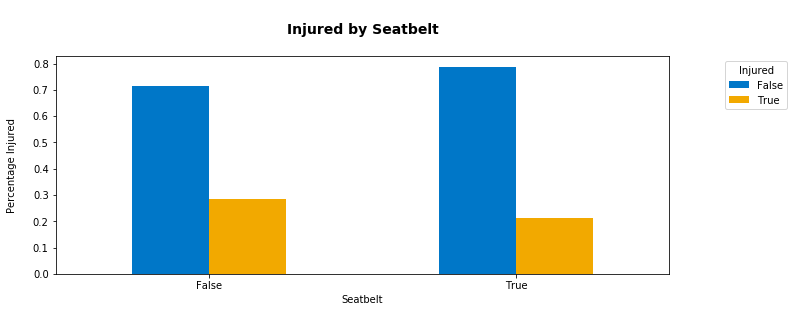

In [316]:
sub_df = df.groupby('seatbelt')['injured'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['#0077c8','#f2a900'], figsize=(11,4))
plt.xlabel("Seatbelt")
plt.xticks(rotation=0)
plt.ylabel("Percentage Injured\n")
plt.title('\nInjured by Seatbelt\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Injured');

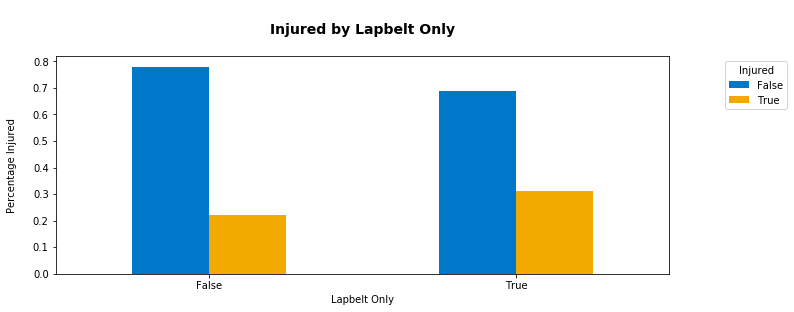

In [318]:
sub_df = df.groupby('lapbelt_only')['injured'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['#0077c8','#f2a900'], figsize=(11,4))
plt.xlabel("Lapbelt Only")
plt.xticks(rotation=0)
plt.ylabel("Percentage Injured\n")
plt.title('\nInjured by Lapbelt Only\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Injured');

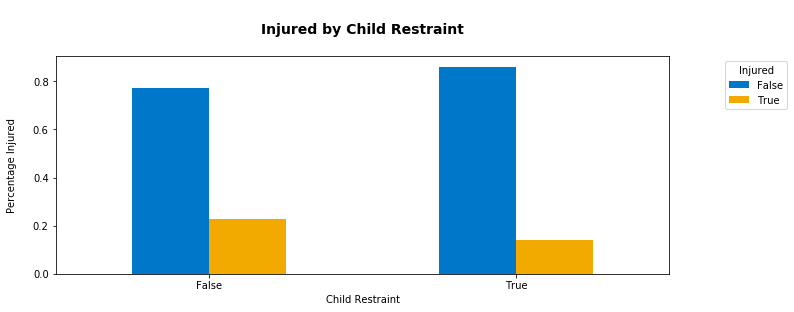

In [317]:
sub_df = df.groupby('childrestraint')['injured'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['#0077c8','#f2a900'], figsize=(11,4))
plt.xlabel("Child Restraint")
plt.xticks(rotation=0)
plt.ylabel("Percentage Injured\n")
plt.title('\nInjured by Child Restraint\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Injured');

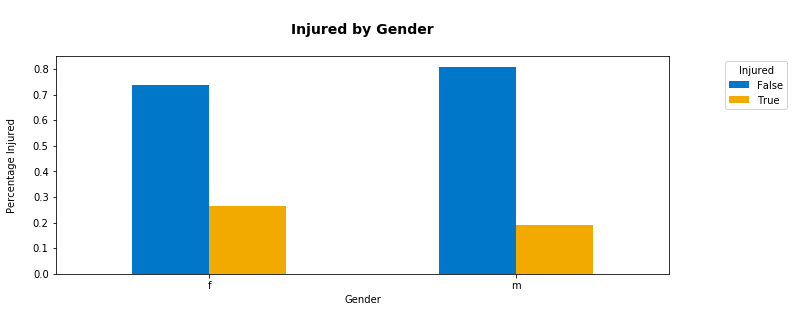

In [31]:
sub_df = df.groupby('sex')['injured'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['#0077c8','#f2a900'], figsize=(11,4))
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Percentage Injured\n")
plt.title('\nInjured by Gender\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Injured');

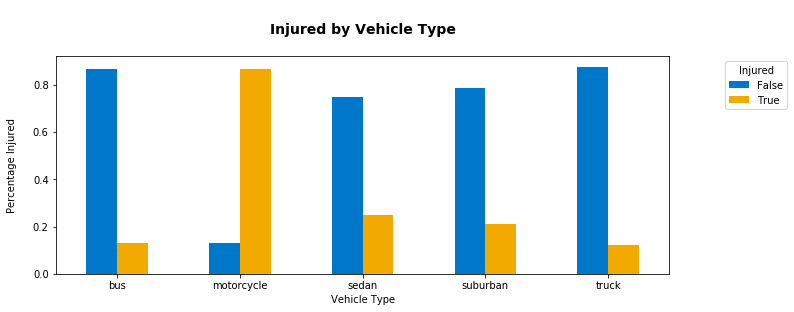

In [32]:
sub_df = df.groupby('veh_type')['injured'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['#0077c8','#f2a900'], figsize=(11,4))
plt.xlabel("Vehicle Type")
plt.xticks(rotation=0)
plt.ylabel("Percentage Injured\n")
plt.title('\nInjured by Vehicle Type\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Injured');

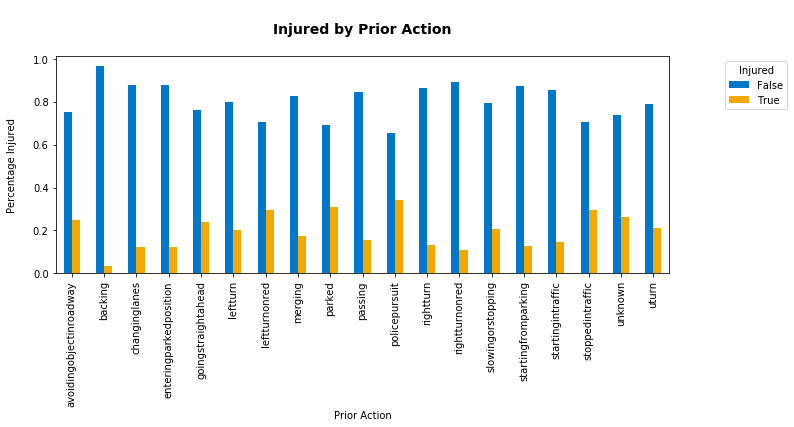

In [33]:
sub_df = df.groupby('prior_action')['injured'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['#0077c8','#f2a900'], figsize=(11,4))
plt.xlabel("Prior Action")
plt.xticks(rotation=90)
plt.ylabel("Percentage Injured\n")
plt.title('\nInjured by Prior Action\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Injured');

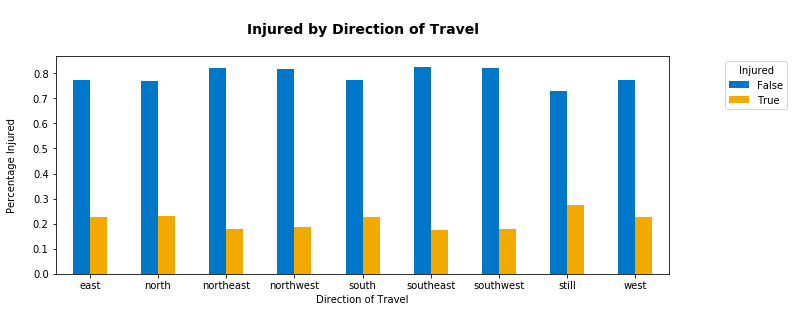

In [34]:
sub_df = df.groupby('direction_travel')['injured'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['#0077c8','#f2a900'], figsize=(11,4))
plt.xlabel("Direction of Travel")
plt.xticks(rotation=0)
plt.ylabel("Percentage Injured\n")
plt.title('\nInjured by Direction of Travel\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Injured');

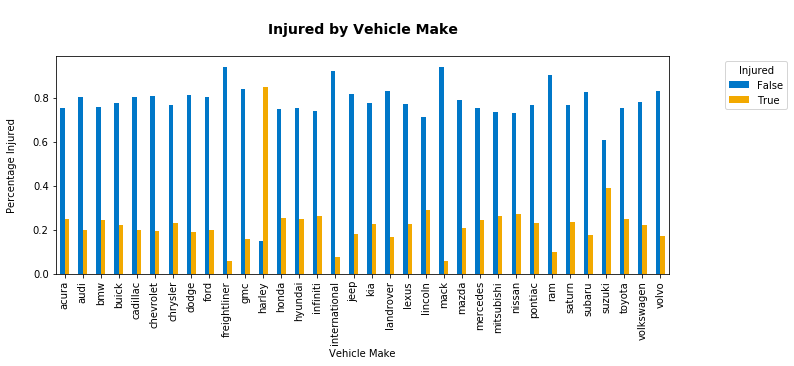

In [35]:
sub_df = df.groupby('veh_make')['injured'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['#0077c8','#f2a900'], figsize=(11,4))
plt.xlabel("Vehicle Make")
plt.xticks(rotation=90)
plt.ylabel("Percentage Injured\n")
plt.title('\nInjured by Vehicle Make\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Injured');

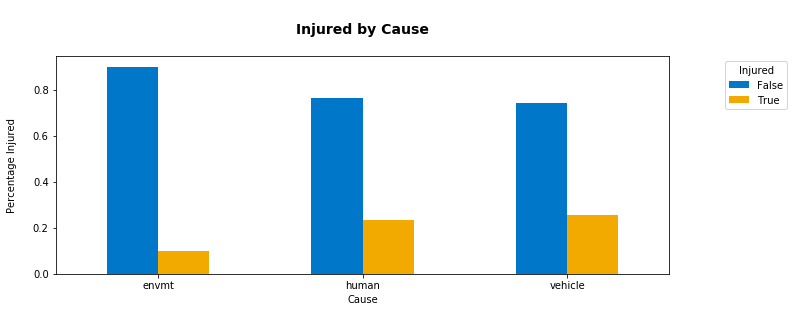

In [36]:
sub_df = df.groupby('cause')['injured'].value_counts(normalize=True).unstack()
sub_df.plot(kind='bar', color=['#0077c8','#f2a900'], figsize=(11,4))
plt.xlabel("Cause")
plt.xticks(rotation=0)
plt.ylabel("Percentage Injured\n")
plt.title('\nInjured by Cause\n', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2, 1.0), title='Injured');

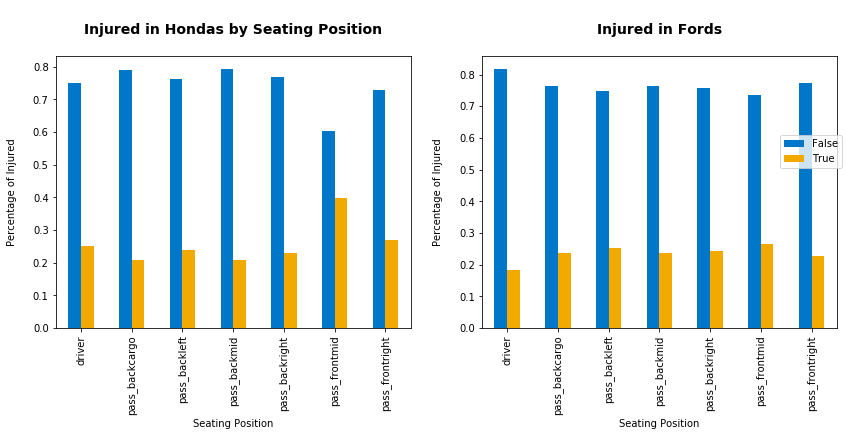

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# create sub-df for males
sub_df_1 = df[df['veh_make']=='honda'].groupby('seating')['injured'].value_counts(normalize=True).unstack()
sub_df_1.plot(kind='bar', color = ['#0077c8','#f2a900'], ax=ax1, legend=False)
ax1.set_title('\nInjured in Hondas by Seating Position\n', fontsize=14, fontweight='bold')
ax1.set_xlabel("Seating Position")
ax1.set_ylabel("Percentage of Injured\n")

# create sub-df for females
sub_df_2 = df[df['veh_make']=='ford'].groupby('seating')['injured'].value_counts(normalize=True).unstack()
sub_df_2.plot(kind='bar', color = ['#0077c8','#f2a900'], ax=ax2, legend=False)
ax2.set_title('\nInjured in Fords\n', fontsize=14, fontweight='bold')
ax2.set_xlabel("Seating Position")
ax2.set_ylabel("Percentage of Injured\n")

# create one legend
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.84, 0.85))
plt.show();

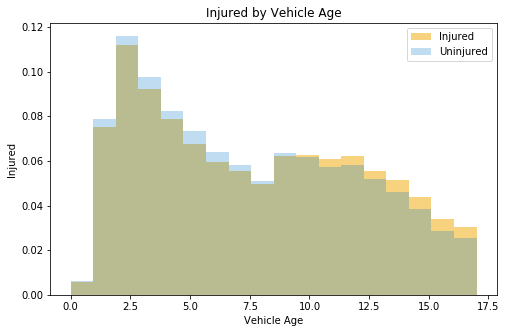

In [38]:
plt.figure(figsize=(8,5))
plt.hist(np.array(df[df.injured==True].veh_age), bins=18, alpha=.5, label="Injured", density=True, color="#f2a900")
plt.hist(np.array(df[df.injured==False].veh_age), bins=18, alpha=.25, label="Uninjured", density=True, color='#0077c8')
plt.title('Injured by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Injured')
plt.legend()
plt.show()

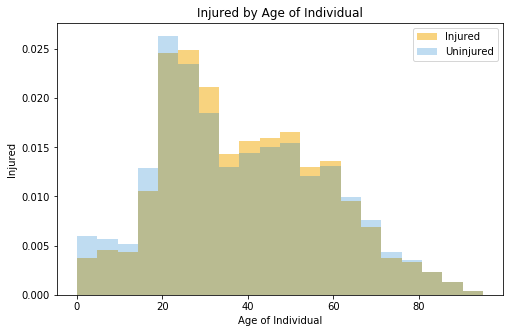

In [39]:
plt.figure(figsize=(8,5))
plt.hist(np.array(df[df.injured==True].age), bins=20, alpha=.5, label="Injured", density=True, color="#f2a900")
plt.hist(np.array(df[df.injured==False].age), bins=20, alpha=.25, label="Uninjured", density=True, color="#0077c8")
plt.title('Injured by Age of Individual')
plt.xlabel('Age of Individual')
plt.ylabel('Injured')
plt.legend()
plt.show()

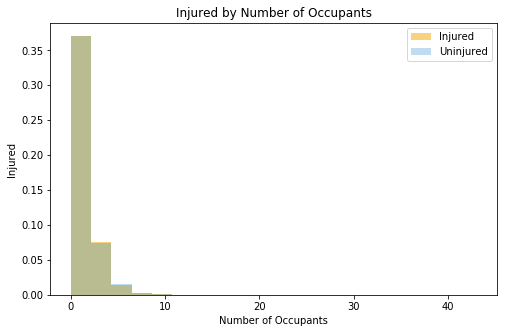

In [40]:
plt.figure(figsize=(8,5))
plt.hist(np.array(df[df.injured==True].num_occupants), bins=20, alpha=.5, label="Injured", density=True, color="#f2a900")
plt.hist(np.array(df[df.injured==False].num_occupants), bins=20, alpha=.25, label="Uninjured", density=True, color="#0077c8")
plt.title('Injured by Number of Occupants')
plt.xlabel('Number of Occupants')
plt.ylabel('Injured')
plt.legend()
plt.show()

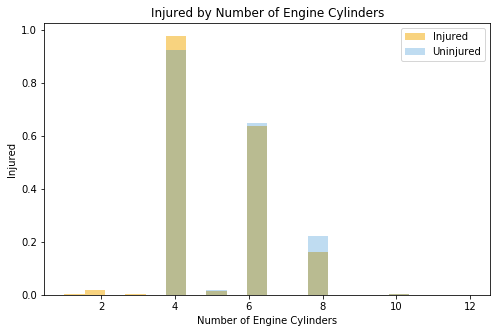

In [41]:
plt.figure(figsize=(8,5))
plt.hist(np.array(df[df.injured==True].engine_cylinders), bins=20, alpha=.5, label="Injured", density=True, color="#f2a900")
plt.hist(np.array(df[df.injured==False].engine_cylinders), bins=20, alpha=.25, label="Uninjured", density=True, color="#0077c8")
plt.title('Injured by Number of Engine Cylinders')
plt.xlabel('Number of Engine Cylinders')
plt.ylabel('Injured')
plt.legend()
plt.show()

#### Injured Status for Individuals Within the Same Vehicle

In [42]:
df.veh_id.value_counts().head(10)

13614717    43
14143623    36
14098498    35
14060817    33
13564823    32
14107440    32
14035127    32
14067754    30
14140812    28
14173720    27
Name: veh_id, dtype: int64

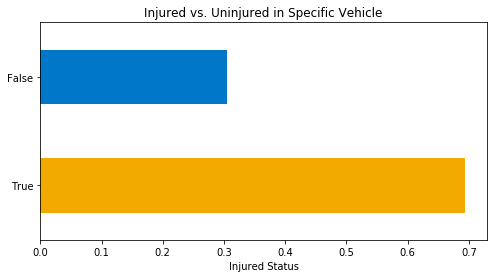

In [43]:
plt.figure(figsize=(8,4))
df[df.veh_id == "14143623"].injured.value_counts(normalize=True).plot(kind='barh', color=['#f2a900','#0077c8'])
plt.title('Injured vs. Uninjured in Specific Vehicle')
plt.xlabel('Injured Status')
plt.show()

In [44]:
df[(df.veh_id == "14143623")]

,veh_id,seating,sex,age,airbag,seatbelt,lapbelt_only,childrestraint,injured,veh_type,prior_action,direction_travel,num_occupants,engine_cylinders,veh_make,cause,veh_age
ind_id,,,,,,,,,,,,,,,,,
18518750,14143623,driver,m,68,False,True,False,False,False,bus,goingstraightahead,south,43,4,international,human,9
18518786,14143623,pass_backcargo,f,15,False,False,False,False,False,bus,goingstraightahead,south,43,4,international,human,9
18518792,14143623,pass_backcargo,m,38,False,False,False,False,False,bus,goingstraightahead,south,43,4,international,human,9
18518794,14143623,pass_backcargo,f,15,False,False,False,False,True,bus,goingstraightahead,south,43,4,international,human,9
18518795,14143623,pass_backcargo,f,16,False,False,False,False,False,bus,goingstraightahead,south,43,4,international,human,9
18518796,14143623,pass_backcargo,m,15,False,False,False,False,False,bus,goingstraightahead,south,43,4,international,human,9
18518799,14143623,pass_backcargo,m,15,False,False,False,False,True,bus,goingstraightahead,south,43,4,international,human,9
18518800,14143623,pass_backcargo,m,15,False,False,False,False,False,bus,goingstraightahead,south,43,4,international,human,9
18518801,14143623,pass_backcargo,f,15,False,False,False,False,True,bus,goingstraightahead,south,43,4,international,human,9


In [45]:
df[(df.veh_id == "14143623") & (df.injured == True)]

,veh_id,seating,sex,age,airbag,seatbelt,lapbelt_only,childrestraint,injured,veh_type,prior_action,direction_travel,num_occupants,engine_cylinders,veh_make,cause,veh_age
ind_id,,,,,,,,,,,,,,,,,
18518794,14143623,pass_backcargo,f,15,False,False,False,False,True,bus,goingstraightahead,south,43,4,international,human,9
18518799,14143623,pass_backcargo,m,15,False,False,False,False,True,bus,goingstraightahead,south,43,4,international,human,9
18518801,14143623,pass_backcargo,f,15,False,False,False,False,True,bus,goingstraightahead,south,43,4,international,human,9
18518802,14143623,pass_backcargo,f,15,False,False,False,False,True,bus,goingstraightahead,south,43,4,international,human,9
18518803,14143623,pass_backcargo,f,4,False,False,False,False,True,bus,goingstraightahead,south,43,4,international,human,9
18518804,14143623,pass_backcargo,f,15,False,False,False,False,True,bus,goingstraightahead,south,43,4,international,human,9
18518805,14143623,pass_backcargo,m,15,False,False,False,False,True,bus,goingstraightahead,south,43,4,international,human,9
18518806,14143623,pass_backcargo,m,16,False,False,False,False,True,bus,goingstraightahead,south,43,4,international,human,9
18518807,14143623,pass_backcargo,m,16,False,False,False,False,True,bus,goingstraightahead,south,43,4,international,human,9


### Exploring just the injured individuals

In [46]:
injured_df = df[df.injured == True]

In [47]:
injured_df.describe()

,age,num_occupants,engine_cylinders,veh_age
count,118538.000000,118538.000000,118538.000000,118538.000000
mean,39.117853,1.855034,5.048347,7.678601
std,18.642681,1.506125,1.361116,4.791705
min,0.000000,0.000000,1.000000,0.000000
25%,24.000000,1.000000,4.000000,3.000000
50%,37.000000,1.000000,4.000000,7.000000
75%,53.000000,2.000000,6.000000,12.000000
max,95.000000,43.000000,12.000000,17.000000


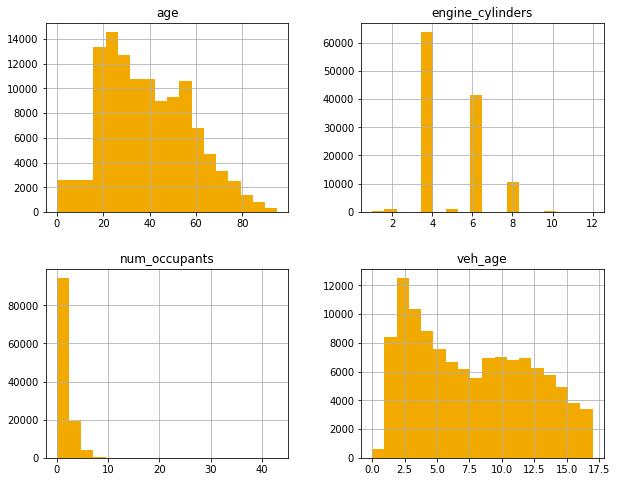

In [48]:
injured_df[numeric_cols].hist(bins=18,figsize=(10,8),color='#f2a900');

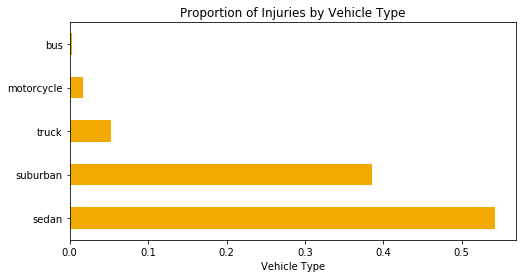

In [49]:
plt.figure(figsize=(8,4))
injured_df.veh_type.value_counts(normalize=True).plot(kind='barh',color='#f2a900')
plt.title('Proportion of Injuries by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.show()

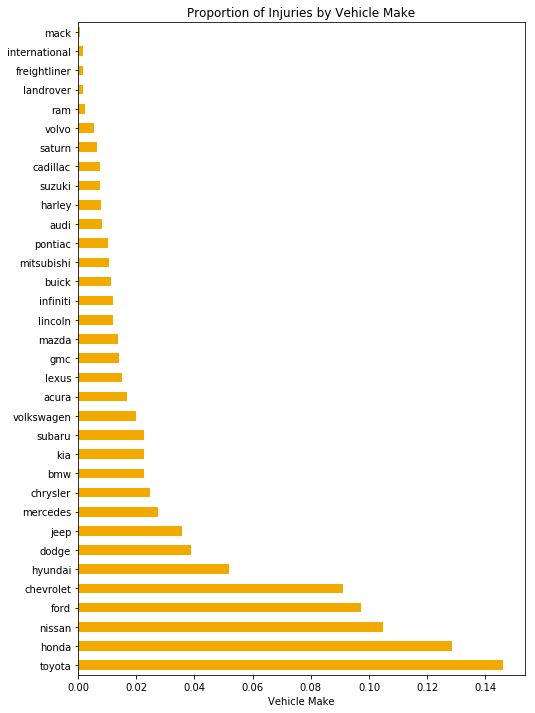

In [50]:
plt.figure(figsize=(8,12))
injured_df.veh_make.value_counts(normalize=True).plot(kind='barh',color='#f2a900')
plt.title('Proportion of Injuries by Vehicle Make')
plt.xlabel('Vehicle Make')
plt.show()

## Preparing the Data for Modeling

### Multicollinearity Heat Map

The heat map reveals information regarding the relationship between the different features. A high value (indicated by a value that's close to either -1 or 1) can indicate concern, as that means that the features involved might influence each other and give inaccurate information regarding their predictive ability for the target.

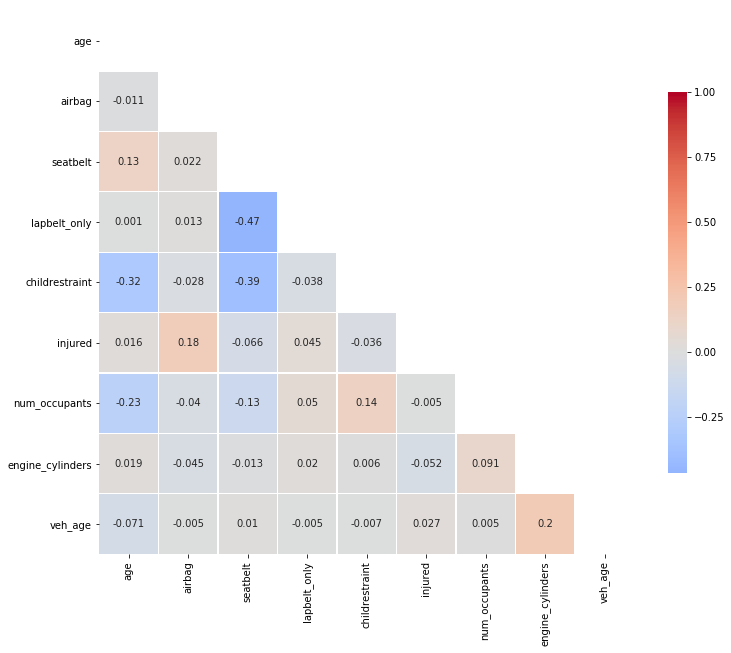

In [224]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 10))

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(round(df.corr(),3), mask=mask, cbar_kws={'shrink':.7}, annot=True, center=0, linewidth=0.3, cmap='coolwarm');

There is no strong collinearity between any pair of features. The closest trend is a mild negative correlation between individuals who wore seatbelts and those who wore lapbelts only without the shoulder strap (commonly available in back middle seats). I am not worried about this slight correlation, though.

### Standard Scaler

The continuous features need to be scaled to the same scale to analyze them without distorted weighting, as the scales for each may differ. Standard Scaler transforms the data in each feature to have a mean of 0 and a standard deviation of 1.

In [225]:
df_scale = df.copy(deep=True)

In [226]:
from sklearn.preprocessing import StandardScaler

In [227]:
sc = StandardScaler()

In [228]:
df_scale[numeric_cols] = sc.fit_transform(df_scale[numeric_cols])

In [229]:
df_scale.describe()

,age,num_occupants,engine_cylinders,veh_age
count,5.288780e+05,5.288780e+05,5.288780e+05,5.288780e+05
mean,1.687906e-15,-3.684147e-14,5.253095e-15,-9.694591e-15
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.988849e+00,-1.139205e+00,-2.993087e+00,-1.579871e+00
25%,-8.015033e-01,-5.297896e-01,-8.467617e-01,-9.429558e-01
50%,-1.303951e-01,-5.297896e-01,-8.467617e-01,-9.373599e-02
75%,7.472080e-01,7.962602e-02,5.841218e-01,7.554838e-01
max,2.915404e+00,2.506567e+01,4.876772e+00,2.029313e+00


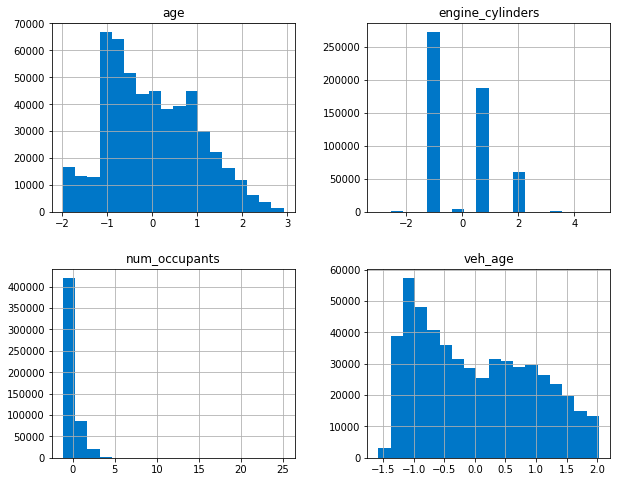

In [230]:
df_scale[numeric_cols].hist(bins=18,figsize=(10,8), color='#0077c8');

### Log Transform

Regression tasks only work with data that is close to normal, for accurate predictive value. Each of the continuous datasets display positive skew. I will perform a log transformation to help the data conform to normality.

In [321]:
df.describe().columns

Index(['age', 'num_occupants', 'engine_cylinders', 'veh_age'], dtype='object')

In [323]:
df_log = df_scale.copy(deep=True)

In [324]:
for c in [numeric_cols]:
    df_log[c] = np.log(df_log[c]+10)

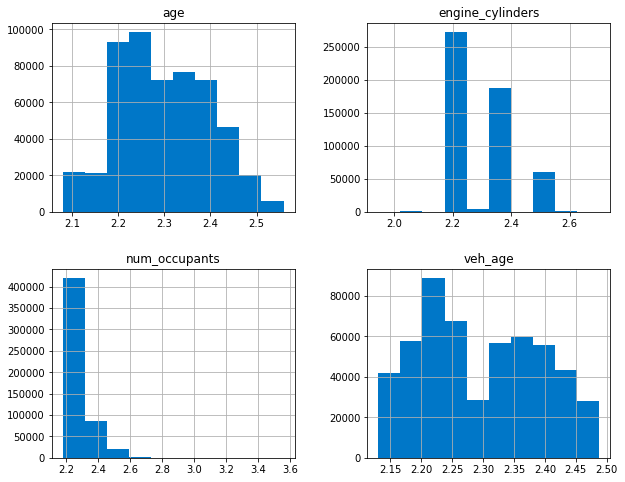

In [325]:
df_log[df.describe().columns].hist(bins=10,figsize=(10,8), color='#0077c8');

In [234]:
for each in list(numeric_cols):
    print('For '+str(each)+' the skew is '+str(round(skew(df_log[each]),3))+' and the kurtosis is '+str(round(kurtosis(df_log[each]),3)))

For age the skew is 0.139 and the kurtosis is -0.671
For num_occupants the skew is 3.948 and the kurtosis is 35.289
For engine_cylinders the skew is 0.587 and the kurtosis is -0.629
For veh_age the skew is 0.21 and the kurtosis is -1.186


It looks better for most of the numeric columns. The number of occupants feature did not improve by much, though. As we saw in our EDA earlier, 71% of the reported motor vehicle accidents involved solo drivers. This data will likely continue to remain skewed, so I will just drop this column.

In [326]:
df_log = df_log.drop(columns=['num_occupants'])

### One Hot Encoding

Categorical data must be transformed to numeric data for modeling. To do that, I will use one hot encoding, which breaks the options for each feature into individual columns, detailing whether or not the entry for that line contains each feature option.

In [236]:
view(df_log,2)

,veh_id,seating,sex,age,airbag,seatbelt,lapbelt_only,childrestraint,injured,veh_type,prior_action,direction_travel,engine_cylinders,veh_make,cause,veh_age
ind_id,,,,,,,,,,,,,,,,
17475364,13364180,driver,f,2.224637,True,True,False,False,True,suburban,goingstraightahead,east,2.214108,nissan,human,2.179823
17475365,13364180,pass_backmid,m,2.087258,False,False,False,True,False,suburban,goingstraightahead,east,2.214108,nissan,human,2.179823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19505119,14867165,driver,f,2.335461,False,True,False,False,True,suburban,stoppedintraffic,south,2.214108,ford,human,2.203543
19505120,14867165,pass_frontright,m,2.167210,False,True,False,False,True,suburban,stoppedintraffic,south,2.214108,ford,human,2.203543


In [237]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528878 entries, 17475364 to 19505120
Data columns (total 16 columns):
veh_id              528878 non-null object
seating             528878 non-null object
sex                 528878 non-null object
age                 528878 non-null float64
airbag              528878 non-null bool
seatbelt            528878 non-null bool
lapbelt_only        528878 non-null bool
childrestraint      528878 non-null bool
injured             528878 non-null bool
veh_type            528878 non-null object
prior_action        528878 non-null object
direction_travel    528878 non-null object
engine_cylinders    528878 non-null float64
veh_make            528878 non-null object
cause               528878 non-null object
veh_age             528878 non-null float64
dtypes: bool(5), float64(3), object(8)
memory usage: 50.9+ MB


Before one hot encoding my features, I want to convert my boolean features to strings so that they can be included in the process.

In [238]:
df_log.airbag = df_log.airbag.astype(str)
df_log.seatbelt = df_log.seatbelt.astype(str)
df_log.lapbelt_only = df_log.lapbelt_only.astype(str)
df_log.childrestraint = df_log.childrestraint.astype(str)

In [239]:
df_log = df_log.drop(columns=['veh_id'])

In [240]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528878 entries, 17475364 to 19505120
Data columns (total 15 columns):
seating             528878 non-null object
sex                 528878 non-null object
age                 528878 non-null float64
airbag              528878 non-null object
seatbelt            528878 non-null object
lapbelt_only        528878 non-null object
childrestraint      528878 non-null object
injured             528878 non-null bool
veh_type            528878 non-null object
prior_action        528878 non-null object
direction_travel    528878 non-null object
engine_cylinders    528878 non-null float64
veh_make            528878 non-null object
cause               528878 non-null object
veh_age             528878 non-null float64
dtypes: bool(1), float64(3), object(11)
memory usage: 61.0+ MB


In [241]:
X = df_log.drop(columns=['injured']) # Features
y = df_log.injured # Target

In [242]:
X = pd.get_dummies(X, drop_first=True)

In [243]:
view(X,2)

,age,engine_cylinders,veh_age,seating_pass_backcargo,seating_pass_backleft,seating_pass_backmid,seating_pass_backright,seating_pass_frontmid,seating_pass_frontright,sex_m,airbag_True,seatbelt_True,lapbelt_only_True,childrestraint_True,veh_type_motorcycle,veh_type_sedan,veh_type_suburban,veh_type_truck,prior_action_backing,prior_action_changinglanes,prior_action_enteringparkedposition,prior_action_goingstraightahead,prior_action_leftturn,prior_action_leftturnonred,prior_action_merging,prior_action_parked,prior_action_passing,prior_action_policepursuit,prior_action_rightturn,prior_action_rightturnonred,prior_action_slowingorstopping,prior_action_startingfromparking,prior_action_startingintraffic,prior_action_stoppedintraffic,prior_action_unknown,prior_action_uturn,direction_travel_north,direction_travel_northeast,direction_travel_northwest,direction_travel_south,direction_travel_southeast,direction_travel_southwest,direction_travel_still,direction_travel_west,veh_make_audi,veh_make_bmw,veh_make_buick,veh_make_cadillac,veh_make_chevrolet,veh_make_chrysler,veh_make_dodge,veh_make_ford,veh_make_freightliner,veh_make_gmc,veh_make_harley,veh_make_honda,veh_make_hyundai,veh_make_infiniti,veh_make_international,veh_make_jeep,veh_make_kia,veh_make_landrover,veh_make_lexus,veh_make_lincoln,veh_make_mack,veh_make_mazda,veh_make_mercedes,veh_make_mitsubishi,veh_make_nissan,veh_make_pontiac,veh_make_ram,veh_make_saturn,veh_make_subaru,veh_make_suzuki,veh_make_toyota,veh_make_volkswagen,veh_make_volvo,cause_human,cause_vehicle
ind_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17475364,2.224637,2.214108,2.179823,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
17475365,2.087258,2.214108,2.179823,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19505119,2.335461,2.214108,2.203543,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
19505120,2.167210,2.214108,2.203543,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


There are now 79 feature columns after one hot encoding.

In [72]:
# Saving the cleaned features set
X.to_csv('crash_features.csv')

In [73]:
# Saving the cleaned target variable
y.to_csv('crash_target.txt')

## Modeling

Now that the data has been cleaned and prepped, I can begin modeling. I intend to use 3 different types of models for this classification task: Logistic Regression, Random Forest, and XGBoost.

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_curve, classification_report

In [245]:
# Separating the data into a training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"Training set has {X_train.shape[0]} samples")
print(f"Testing set has {X_test.shape[0]} samples")

Training set has 423102 samples
Testing set has 105776 samples


### Importing Packages for Modeling

In [246]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [247]:
# Importing the packages necessary for running and tuning each of these models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

import itertools

In [248]:
# Defining a function to plot a confusion matrix

def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    plt.grid(b=None)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

#### Saving default train and test sets

I am saving this data that is ready to be used, in case I need to open it in a different notebook or restart this kernel. That way I won't have to repeat all the steps above.

In [84]:
X_train.to_csv('default_X_train.csv')
X_test.to_csv('default_X_test.csv')
y_train.to_csv('default_y_train.txt')
y_test.to_csv('default_y_test.txt')

### Vanilla Logistic Regression

The first model I will run will be a logistic regression model. Vanilla just means that no parameters have been adjusted. It provides a baseline model, to which I can compare our tuned models.

In [250]:
# Instatiate the logistic regression

logreg = LogisticRegression()

In [251]:
# Fit the model

logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [252]:
# Predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

# Logistic regression scores
train_accuracy_logreg = accuracy_score(y_train, y_hat_train)
test_accuracy_logreg = accuracy_score(y_test, y_hat_test)
report_logreg = classification_report(y_test, y_hat_test)

# Print scores
print("Logistic Regression")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_logreg * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_logreg * 100):.4}%")
print()
print("\nClassification report:")
print(report_logreg)
print()

Logistic Regression
-------------------------
Training Accuracy: 78.43%
Test Accuracy:     78.6%


Classification report:
              precision    recall  f1-score   support

       False       0.79      0.98      0.88     82221
        True       0.60      0.12      0.20     23555

   micro avg       0.79      0.79      0.79    105776
   macro avg       0.70      0.55      0.54    105776
weighted avg       0.75      0.79      0.73    105776




#### Confusion Matrix

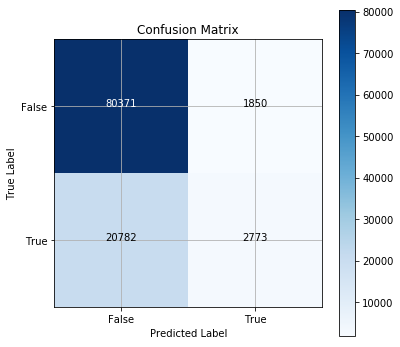

In [253]:
# Confusion matrix

plt.figure(figsize=(6,6))
plot_cf(y_test, y_hat_test);

The training and test accuracy look decent. However, the recall score for the True values is terrible. This is due to the imbalance of the classes, as 23% of the entries from the dataset are individuals who were injured (in other words True for the target). We will need to address this by resampling the data.

## Balancing the Data

To balance the data, I will use SMOTE: Synthetic Minority Over-sampling Technique. This is an oversampling technique that helps address class imbalance by generating synthetic data based on the feature space similarities between existing instances in the minority class.

In [89]:
from imblearn.over_sampling import SMOTE

In [90]:
# Previous class distribution

print(y.value_counts())

False    410340
True     118538
Name: injured, dtype: int64


In [91]:
# Resample the training data
X_resamp, y_resamp = SMOTE().fit_sample(X_train, y_train) 

# View synthetic sample class distribution
print(pd.Series(y_resamp).value_counts())
print()

True     328119
False    328119
dtype: int64



In [95]:
# Separating the resampled data into a training and testing set

X_train, X_test, y_train, y_test = train_test_split(X_resamp, y_resamp, test_size=0.2, random_state=0)

#### Saving balanced train and test sets

In [104]:
pd.DataFrame(X_train).to_csv("balanced_X_train.csv", header=None, index=None)
pd.DataFrame(X_test).to_csv("balanced_X_test.csv", header=None, index=None)
pd.DataFrame(y_train).to_csv("balanced_y_train.txt", header=None, index=None)
pd.DataFrame(y_test).to_csv("balanced_y_test.txt", header=None, index=None)

### Logistic Regression with Balanced Data

In [105]:
# Instatiate the logistic regression
logreg2 = LogisticRegression()

In [106]:
# Fit the model
logreg2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
# Make predictions
train_preds_logreg2 = logreg2.predict(X_train)
test_preds_logreg2 = logreg2.predict(X_test)

# Logistic regression scores
train_accuracy_logreg2 = accuracy_score(y_train, train_preds_logreg2)
test_accuracy_logreg2 = accuracy_score(y_test, test_preds_logreg2)
report_logreg2 = classification_report(y_test, test_preds_logreg2)

# Print scores
print("Logistic Regression")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_logreg * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_logreg * 100):.4}%")
print()
print("\nClassification report:")
print(report_logreg)
print()

Logistic Regression
-------------------------
Training Accuracy: 63.02%
Test Accuracy:     63.1%


Classification report:
              precision    recall  f1-score   support

       False       0.64      0.61      0.62     65482
        True       0.63      0.65      0.64     65766

   micro avg       0.63      0.63      0.63    131248
   macro avg       0.63      0.63      0.63    131248
weighted avg       0.63      0.63      0.63    131248




In [86]:
# Instantiate
logreg2 = LogisticRegression()

# train the random logreg2
logreg2.fit(X_train, y_train)

# predict
train_preds_logreg2 = logreg2.predict(X_train)
test_preds_logreg2 = logreg2.predict(X_test)

# evaluate
train_accuracy_logreg2 = accuracy_score(y_train, train_preds_logreg2)
test_accuracy_logreg2 = accuracy_score(y_test, test_preds_logreg2)
report_logreg2 = classification_report(y_test, test_preds_logreg2)

print("Logist Regression - Balanced")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_logreg2 * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_logreg2 * 100):.4}%")

print("\nClassification report:")
print(report_logreg2)
print()

Logist Regression - Balanced
-------------------------
Training Accuracy: 63.02%
Test Accuracy:     63.1%

Classification report:
              precision    recall  f1-score   support

       False       0.64      0.61      0.62     65482
        True       0.63      0.65      0.64     65765

   micro avg       0.63      0.63      0.63    131247
   macro avg       0.63      0.63      0.63    131247
weighted avg       0.63      0.63      0.63    131247




#### Confusion Matrix for Logistic Regression with Balanced Data

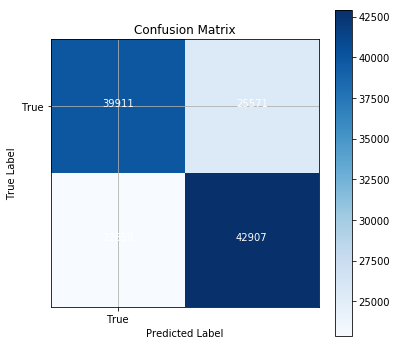

In [188]:
# Confusion matrix

plt.figure(figsize=(6,6))
plot_cf(y_test, test_preds_logreg2);

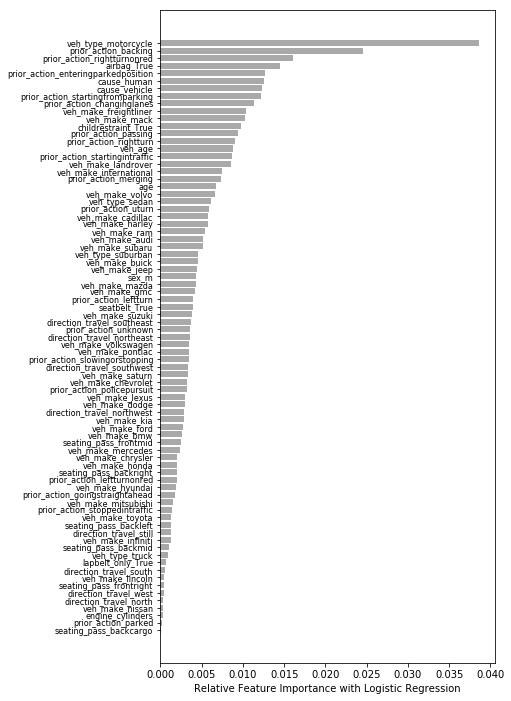

In [259]:
feat_importances_logreg2 = abs(logreg2.coef_[0])/100
sorted_idx = np.argsort(feat_importances_logreg2)
pos = np.arange(sorted_idx.shape[0])

featfig = plt.figure(figsize=(6,12))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feat_importances_logreg2[sorted_idx], align='center', color='darkgrey')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance with Logistic Regression');

AUC: 0.63096


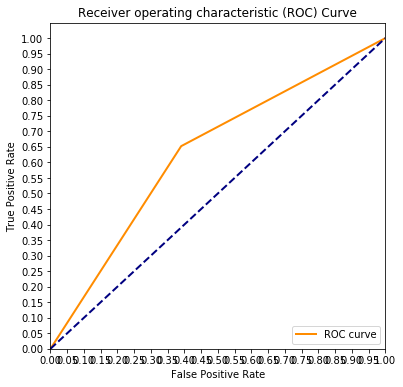

In [258]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds_logreg2)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc,5))

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [287]:
# Creating a dataframe to store the model scores

models = pd.DataFrame()

In [288]:
score_logreg = ['Logistic Regression', train_accuracy_logreg2, test_accuracy_logreg2]
models = models.append([score_logreg])

### Random Forest

In [185]:
# Instantiate
forest = RandomForestClassifier()

# train the random forest
forest.fit(X_train, y_train)

# predict
train_preds_forest = forest.predict(X_train)
test_preds_forest = forest.predict(X_test)

# evaluate
train_accuracy_forest = accuracy_score(y_train, train_preds_forest)
test_accuracy_forest = accuracy_score(y_test, test_preds_forest)
report_forest = classification_report(y_test, test_preds_forest)

print("Random Forest")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest * 100):.4}%")

print("\nClassification report:")
print(report_forest)
print()

Random Forest
-------------------------
Training Accuracy: 97.9%
Test Accuracy:     80.05%

Classification report:
              precision    recall  f1-score   support

       False       0.78      0.84      0.81     65482
        True       0.83      0.76      0.79     65765

   micro avg       0.80      0.80      0.80    131247
   macro avg       0.80      0.80      0.80    131247
weighted avg       0.80      0.80      0.80    131247




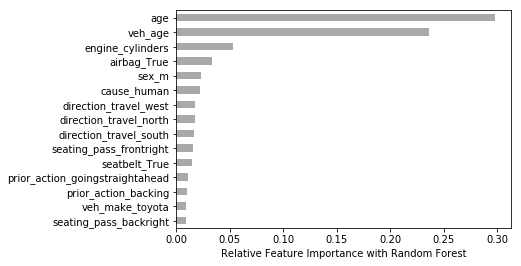

In [261]:
feat_importances_forest = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances_forest.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(6,4))

plt.xlabel('Relative Feature Importance with Random Forest');

AUC: 0.80057


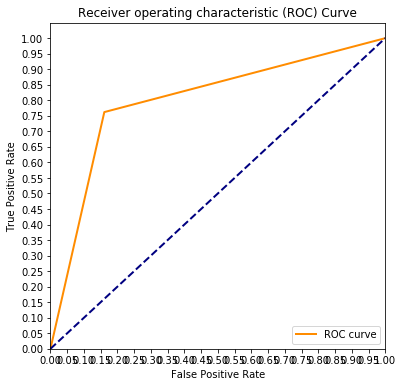

In [262]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds_forest)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc,5))

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The numbers look pretty good. However, there seems to be an overemphasis on the numeric features. This probably needs to be accounted for by parameter tuning.

### Parameter Tuning for Random Forest

In [97]:
# Instantiate the random forest classifier
forest = RandomForestClassifier()

In [98]:
# Create grid    
param_grid = {'n_estimators': [80, 100, 120],
              'criterion': ['gini', 'entropy'],
              'max_features': [5, 7, 9],         
              'max_depth': [5, 8, 10], 
              'min_samples_split': [2, 3, 4]}

# Instantiate the tuned random forest
forest_grid_search1 = GridSearchCV(forest, param_grid, cv=3, n_jobs=-1)

# Train the tuned random forest
forest_grid_search1.fit(X_train, y_train)

# Print best estimator parameters found during the grid search
print(forest_grid_search1.best_params_)
print()

{'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'min_samples_split': 2, 'n_estimators': 120}



In [85]:
# instantiate the tuned random forest with the best found parameters
forest1 = RandomForestClassifier(n_estimators=120, criterion='gini', max_features=9, 
                                max_depth=10, min_samples_split=2, random_state=4)

# train the random forest
forest1.fit(X_train, y_train)

# predict
train_preds_forest1 = forest1.predict(X_train)
test_preds_forest1 = forest1.predict(X_test)

# evaluate
train_accuracy_forest1 = accuracy_score(y_train, train_preds_forest1)
test_accuracy_forest1 = accuracy_score(y_test, test_preds_forest1)
report_forest1 = classification_report(y_test, test_preds_forest1)

print("Random Forest - Tuned")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest1 * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest1 * 100):.4}%")

print("\nClassification report:")
print(report_forest1)
print()

Random Forest - Tuned
-------------------------
Training Accuracy: 68.01%
Test Accuracy:     67.76%

Classification report:
              precision    recall  f1-score   support

       False       0.68      0.68      0.68     65482
        True       0.68      0.67      0.68     65765

   micro avg       0.68      0.68      0.68    131247
   macro avg       0.68      0.68      0.68    131247
weighted avg       0.68      0.68      0.68    131247




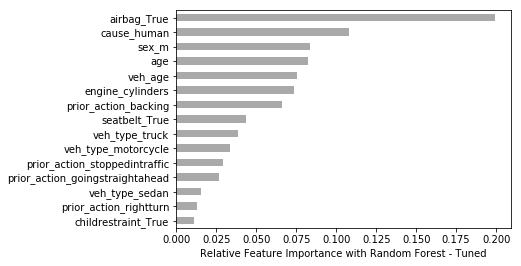

In [263]:
feat_importances_forest1 = pd.Series(forest1.feature_importances_, index=X.columns)
feat_importances_forest1.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(6,4))

plt.xlabel('Relative Feature Importance with Random Forest - Tuned');

AUC: 0.67764


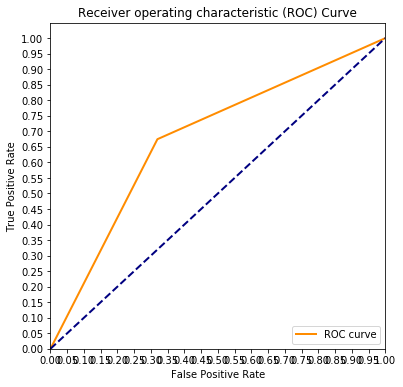

In [264]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds_forest1)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc,5))

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Parameter Tuning for Random Forest, Second Attempt

In [69]:
# Create grid    
param_grid = {'n_estimators': [20, 60, 100],     
              'max_depth': [4, 5, 6], 
              'min_samples_leaf': [0.05, 0.1, 0.2],
              'min_samples_split': [0.05, 0.1, 0.2]}

# Instantiate the tuned random forest
forest_grid_search2 = GridSearchCV(forest, param_grid, cv=3, n_jobs=-1)

# Train the tuned random forest
forest_grid_search2.fit(X_train, y_train)

# Print best estimator parameters found during the grid search
print(forest_grid_search2.best_params_)
print()

{'max_depth': 6, 'min_samples_leaf': 0.05, 'min_samples_split': 0.2, 'n_estimators': 100}



In [81]:
# instantiate the tuned random forest with the best found parameters
forest2 = RandomForestClassifier(n_estimators=100, max_depth=6, 
                                 min_samples_leaf=0.05, min_samples_split=0.2, random_state=4)

# train the random forest
forest2.fit(X_train, y_train)

# predict
train_preds_forest2 = forest2.predict(X_train)
test_preds_forest2 = forest2.predict(X_test)

# evaluate
train_accuracy_forest2 = accuracy_score(y_train, train_preds_forest2)
test_accuracy_forest2 = accuracy_score(y_test, test_preds_forest2)
report_forest2 = classification_report(y_test, test_preds_forest2)

print("Random Forest - Tuned")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest2 * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest2 * 100):.4}%")

print("\nClassification report:")
print(report_forest2)
print()

Random Forest - Tuned
-------------------------
Training Accuracy: 62.78%
Test Accuracy:     62.59%

Classification report:
              precision    recall  f1-score   support

       False       0.62      0.63      0.63     65482
        True       0.63      0.62      0.62     65765

   micro avg       0.63      0.63      0.63    131247
   macro avg       0.63      0.63      0.63    131247
weighted avg       0.63      0.63      0.63    131247




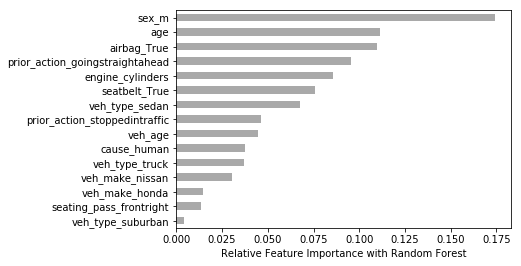

In [266]:
feat_importances2 = pd.Series(forest2.feature_importances_, index=X.columns)
feat_importances2.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(6,4))

plt.xlabel('Relative Feature Importance with Random Forest');

AUC: 0.62587


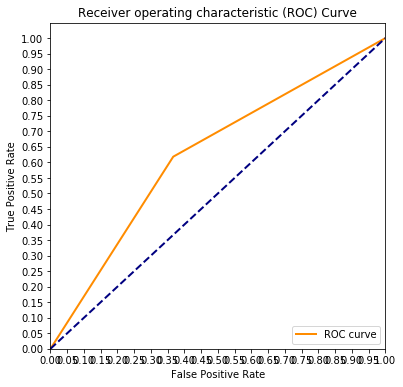

In [267]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds_forest2)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc,5))

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The first parameter tuning attempt gave the best results for Random Forest. I will save that one to compare later.

In [290]:
score_rf = ['Random Forest', train_accuracy_forest1, test_accuracy_forest1]
models = models.append([score_rf])

### XGBoost

In [9]:
# instantiate
booster = xgb.XGBClassifier()

# train the xgboost
booster.fit(X_train, y_train)

# predict
train_preds = booster.predict(X_train)
test_preds = booster.predict(X_test)

# evaluate
train_accuracy_booster = accuracy_score(y_train, train_preds)
test_accuracy_booster = accuracy_score(y_test, test_preds)
report_booster = classification_report(y_test, test_preds)

print("XGBoost")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_booster * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_booster * 100):.4}%")

print("\nClassification report:")
print(report_booster)
print()

XGBoost
-------------------------
Training Accuracy: 74.82%
Test Accuracy:     74.8%

Classification report:
              precision    recall  f1-score   support

       False       0.73      0.79      0.76     65482
        True       0.77      0.71      0.74     65765

   micro avg       0.75      0.75      0.75    131247
   macro avg       0.75      0.75      0.75    131247
weighted avg       0.75      0.75      0.75    131247




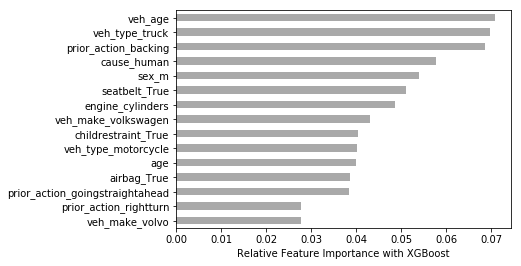

In [269]:
feat_importances_booster = pd.Series(booster.feature_importances_, index=X.columns)
feat_importances_booster.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(6,4))

plt.xlabel('Relative Feature Importance with XGBoost');

AUC: 0.7481


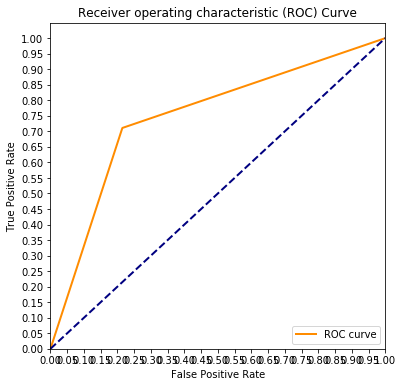

In [270]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc,5))

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Parameter Tuning with XGBoost

In [13]:
pipe_booster = Pipeline([('clf', xgb.XGBClassifier(random_state=11))])

param_booster = [
    {'clf__n_estimators': [100],
     'clf__max_depth': [3, 5, 7],
     'clf__min_child_weight': [1, 3, 5],
     'clf__gamma': [0.0, 0.1]
    }
]

booster_grid_search = GridSearchCV(estimator = pipe_booster,
                                  param_grid = param_booster,
                                  cv=3)

booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(f'Best accuracy: {round(booster_grid_search.best_score_,4)*100}%')
print(f'Best parameters: {booster_grid_search.best_params_}')

Best accuracy: 82.78%
Best parameters: {'clf__gamma': 0.0, 'clf__max_depth': 7, 'clf__min_child_weight': 1, 'clf__n_estimators': 100}


In [16]:
# instantiate
booster2 = xgb.XGBClassifier(n_estimators=100, max_depth=7, min_child_weight=1,
                                 scale_pos_weight=1, gamma=0.0, random_state=4)

# train the xgboost
booster2.fit(X_train, y_train)

# predict
train_preds2 = booster2.predict(X_train)
test_preds2 = booster2.predict(X_test)

# evaluate
train_accuracy_booster2 = accuracy_score(y_train, train_preds2)
test_accuracy_booster2 = accuracy_score(y_test, test_preds2)
report_booster2 = classification_report(y_test, test_preds2)

print("XGBoost - Tuned")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_booster2 * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_booster2 * 100):.4}%")

print("\nClassification report:")
print(report_booster2)
print()

XGBoost - Tuned
-------------------------
Training Accuracy: 82.8%
Test Accuracy:     82.68%

Classification report:
              precision    recall  f1-score   support

       False       0.76      0.95      0.85     65482
        True       0.93      0.70      0.80     65765

   micro avg       0.83      0.83      0.83    131247
   macro avg       0.85      0.83      0.82    131247
weighted avg       0.85      0.83      0.82    131247




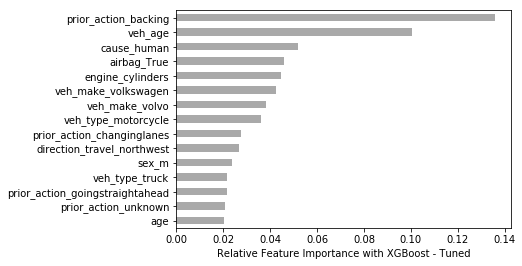

In [271]:
feat_importances_booster2 = pd.Series(booster2.feature_importances_, index=X.columns)
feat_importances_booster2.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(6,4))

plt.xlabel('Relative Feature Importance with XGBoost - Tuned');

AUC: 0.82707


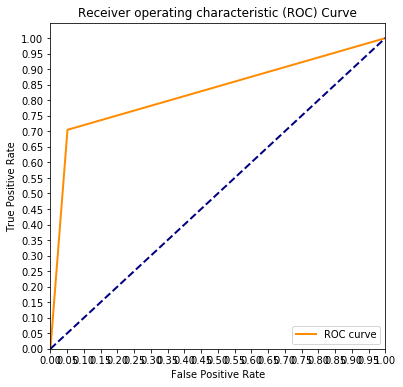

In [272]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds2)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc,5))

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

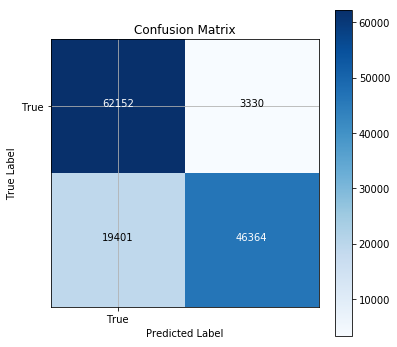

In [273]:
# Confusion matrix

plt.figure(figsize=(6,6))
plot_cf(y_test, test_preds2);

### Parameter Tuning with XGBoost, Second Attempt

In [67]:
# instantiate
booster3 = xgb.XGBClassifier(n_estimators=100, max_depth=5, min_child_weight=1,
                                 scale_pos_weight=1, gamma=0.0, random_state=4)

# train the xgboost
booster3.fit(X_train, y_train)

# predict
train_preds3 = booster3.predict(X_train)
test_preds3 = booster3.predict(X_test)

# evaluate
train_accuracy_booster3 = accuracy_score(y_train, train_preds3)
test_accuracy_booster3 = accuracy_score(y_test, test_preds3)
report_booster3 = classification_report(y_test, test_preds3)

print("XGBoost - Tuned")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_booster3 * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_booster3 * 100):.4}%")

print("\nClassification report:")
print(report_booster3)
print()

XGBoost - Tuned
-------------------------
Training Accuracy: 82.12%
Test Accuracy:     82.05%

Classification report:
              precision    recall  f1-score   support

       False       0.76      0.93      0.84     65482
        True       0.91      0.72      0.80     65765

   micro avg       0.82      0.82      0.82    131247
   macro avg       0.84      0.82      0.82    131247
weighted avg       0.84      0.82      0.82    131247




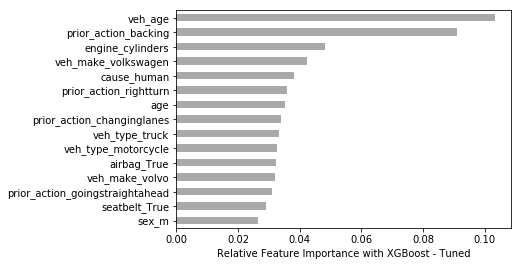

In [274]:
feat_importances_booster3 = pd.Series(booster3.feature_importances_, index=X.columns)
feat_importances_booster3.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(6,4))

plt.xlabel('Relative Feature Importance with XGBoost - Tuned');

AUC: 0.6269


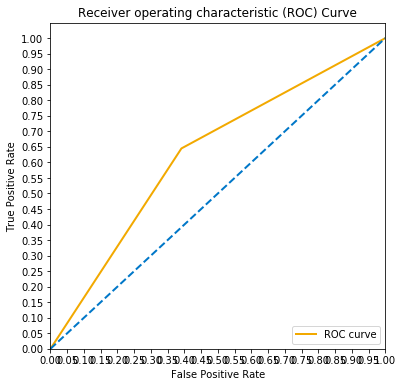

In [275]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds3)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc,5))

plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='#f2a900',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='#0077c8', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The first parameter tuning attempt gave the best results for XGBoost. I will save that one to compare.

In [291]:
score_xgb = ['XGBoost', train_accuracy_booster2, test_accuracy_booster2]
models = models.append([score_xgb])

### Comparing the Models

These were the results for the original vanilla logistic regression.

In [306]:
print("Logistic Regression")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_logreg * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_logreg * 100):.4}%")
print()
print("\nClassification report:")
print(report_logreg)

Logistic Regression
-------------------------
Training Accuracy: 78.43%
Test Accuracy:     78.6%


Classification report:
              precision    recall  f1-score   support

       False       0.79      0.98      0.88     82221
        True       0.60      0.12      0.20     23555

   micro avg       0.79      0.79      0.79    105776
   macro avg       0.70      0.55      0.54    105776
weighted avg       0.75      0.79      0.73    105776



Let's see how the trained models compare.

In [308]:
print('Classification Report XGBoost: \n', report_booster2)
print('------------------------------------------------------')
print('Classification Report Random Forest: \n', report_forest1)
print('------------------------------------------------------')
print('Classification Report Logistic Regression: \n', report_logreg2)

Classification Report XGBoost: 
               precision    recall  f1-score   support

       False       0.76      0.95      0.85     65482
        True       0.93      0.70      0.80     65765

   micro avg       0.83      0.83      0.83    131247
   macro avg       0.85      0.83      0.82    131247
weighted avg       0.85      0.83      0.82    131247

------------------------------------------------------
Classification Report Random Forest: 
               precision    recall  f1-score   support

       False       0.68      0.68      0.68     65482
        True       0.68      0.67      0.68     65765

   micro avg       0.68      0.68      0.68    131247
   macro avg       0.68      0.68      0.68    131247
weighted avg       0.68      0.68      0.68    131247

------------------------------------------------------
Classification Report Logistic Regression: 
               precision    recall  f1-score   support

       False       0.64      0.61      0.62     65482
        Tr

In [304]:
models.columns = ["Model", "Training Accuracy", "Testing Accuracy"]
models.set_index(["Model"], inplace = True)
models = models.sort_values(["Testing Accuracy"], ascending = False)

models

,Training Accuracy,Testing Accuracy
Model,,
XGBoost,0.828038,0.826807
Random Forest,0.680130,0.677638
Logistic Regression,0.630228,0.631009


## Interpretation and Conclusions

XGboost was our strongest predictor by far, ending with a predictive accuracy of 83% and a weighted F1 score of 0.82 after parameter tuning.

Interestingly, the logistic regression and random forest models were more balanced in predicting true positives and negatives for injury. However, despite XGboost having a discrepancy of 0.70 recall for predicting injury to 0.95 recall for predicting no injury, these numbers are still higher than each of the other two models.

This means that the XGBoost model that we have will correctly predict the injury of an individual involved in a motor vehicle crash 70% of the time that he actually is injured. 95% of the time, this model will correctly predict that the individual was not injured in the crash when he indeed was not.

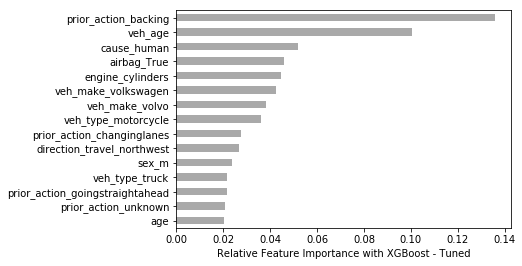

In [309]:
feat_importances_booster2 = pd.Series(booster2.feature_importances_, index=X.columns)
feat_importances_booster2.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(6,4))

plt.xlabel('Relative Feature Importance with XGBoost - Tuned');

As we look at the ranking of the features, some of the biggest components in predicting an injury include:
* Prior action
* Vehicle type
* Vehicle age
* Airbag deployment

As we saw in our EDA, we can make the following conclusions:
* Motor vehicle accidents caused by backing a vehicle does not often result in injury, especially in comparison with other actions.
* The percentage of injuries from motor vehicle crashes is incredibly high. Over 80% of motorcycle crashes result in injury. 
* The age of a vehicle is important to consider. Newer vehicles tend to offer more protection than older vehicles.
* In the case of an airbag deploying, most individuals involved get injured. This can be due to the fact that airbags typically deploy in more serious accidents. Airbags themselves also cause a lot of impact to the individual, which sometimes results in injury.

## Further Research

* Motorcycle injuries
* Other datasets: violations and crash cases
* Motor vehicle build considerations:
    * Weather
    * Road surface